In [4]:
#Importing all the required libraries
import xarray 
import os
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import imdlib as imd
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.io
import matplotlib.patches as mpatches

In [9]:
df=pd.read_csv(r"SSTA Category 1901-2010.csv",index_col=0)
df

,region1,region2,region3,region4,region5,region6,region7,region8,region9,region10,region11,region12
0,3,1,3,3,4,4,3,4,4,1,2,2
1,2,1,1,5,6,5,2,2,3,2,1,2
2,1,2,1,3,5,6,1,3,2,4,1,2
3,1,1,1,2,2,2,2,4,2,1,1,1
4,1,2,1,7,6,5,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
105,6,7,6,4,4,4,6,4,4,6,7,6
106,6,4,7,4,4,6,6,5,4,6,7,7
107,7,6,4,4,2,2,7,6,4,2,4,4
108,7,7,7,4,4,4,6,6,4,6,7,7


2  :  0.36950246895818534
3  :  0.25938598756915043
4  :  0.2540622692961127
5  :  0.2022293567076491
6  :  0.21384772881072342
7  :  0.1649503084785664
8  :  0.19893030440875867
9  :  0.15524775976405059
10  :  0.16393068585754839
11  :  0.17390260259772125
12  :  0.15318515929470736
13  :  0.13350301830304154
14  :  0.1506262177190002


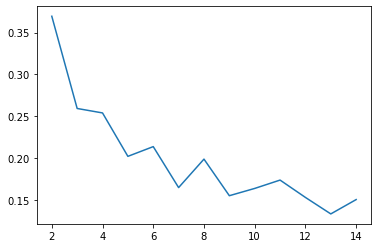

In [15]:
#Validating the number of clusters using silhouette index

k_range = range(2, 15)
silhouette_values=[]

for k in k_range:
    # Create k-means object and fit to data
    kmeans = KMeans(n_clusters=k,random_state=42,n_init=20)
    kmeans.fit(df)
    
    # Get cluster labels
    labels = kmeans.labels_
    
    # Compute silhouette score
    silhouette_values.append(silhouette_score(df, labels))
    
for i in range(len(silhouette_values)):
    print((i+2)," : ",silhouette_values[i])
plt.plot(k_range,silhouette_values)


In [16]:
km = KMeans(n_clusters=8,random_state=42,n_init=30)
km.fit(df) 


values=km.labels_
vals=[i for i in values]
vals

[4,
 7,
 7,
 0,
 7,
 4,
 3,
 0,
 0,
 0,
 0,
 7,
 4,
 7,
 5,
 3,
 0,
 0,
 5,
 6,
 3,
 4,
 4,
 4,
 3,
 6,
 3,
 4,
 4,
 4,
 5,
 4,
 3,
 3,
 3,
 4,
 2,
 3,
 4,
 5,
 1,
 5,
 3,
 6,
 2,
 5,
 6,
 4,
 3,
 3,
 4,
 5,
 5,
 4,
 3,
 3,
 5,
 5,
 6,
 5,
 6,
 6,
 6,
 6,
 4,
 5,
 6,
 3,
 1,
 1,
 6,
 6,
 1,
 6,
 3,
 4,
 6,
 5,
 5,
 1,
 5,
 1,
 1,
 2,
 2,
 6,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 6,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1]

In [17]:
cnt=[0 for i in range(8)]
for i in range(len(vals)):
    cnt[vals[i]]+=1
cnt

[7, 26, 8, 16, 17, 15, 16, 5]

In [18]:
# labels = kmeans.labels_
# labels
km.inertia_

1173.8847446670975

In [19]:
values

array([4, 7, 7, 0, 7, 4, 3, 0, 0, 0, 0, 7, 4, 7, 5, 3, 0, 0, 5, 6, 3, 4,
       4, 4, 3, 6, 3, 4, 4, 4, 5, 4, 3, 3, 3, 4, 2, 3, 4, 5, 1, 5, 3, 6,
       2, 5, 6, 4, 3, 3, 4, 5, 5, 4, 3, 3, 5, 5, 6, 5, 6, 6, 6, 6, 4, 5,
       6, 3, 1, 1, 6, 6, 1, 6, 3, 4, 6, 5, 5, 1, 5, 1, 1, 2, 2, 6, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 6, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1])

In [22]:
years_Cluster={
    0:[],
    1:[],
    2:[],
    3:[],
    4:[],
    5:[],
    6:[],
    7:[],
}

years_Cluster_not_indexs={
    0:[],
    1:[],
    2:[],
    3:[],
    4:[],
    5:[],
    6:[],
    7:[],
}

yr=1901
indx=0
for i in range(len(values)):
    years_Cluster[values[i]].append(indx)
    years_Cluster_not_indexs[values[i]].append(yr)
    indx+=1
    yr+=1

years_Cluster

{0: [3, 7, 8, 9, 10, 16, 17],
 1: [40,
  68,
  69,
  72,
  79,
  81,
  82,
  86,
  87,
  89,
  90,
  91,
  92,
  93,
  94,
  96,
  97,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  108,
  109],
 2: [36, 44, 83, 84, 88, 98, 99, 107],
 3: [6, 15, 20, 24, 26, 32, 33, 34, 37, 42, 48, 49, 54, 55, 67, 74],
 4: [0, 5, 12, 21, 22, 23, 27, 28, 29, 31, 35, 38, 47, 50, 53, 64, 75],
 5: [14, 18, 30, 39, 41, 45, 51, 52, 56, 57, 59, 65, 77, 78, 80],
 6: [19, 25, 43, 46, 58, 60, 61, 62, 63, 66, 70, 71, 73, 76, 85, 95],
 7: [1, 2, 4, 11, 13]}

In [23]:
years_Cluster_not_indexs

{0: [1904, 1908, 1909, 1910, 1911, 1917, 1918],
 1: [1941,
  1969,
  1970,
  1973,
  1980,
  1982,
  1983,
  1987,
  1988,
  1990,
  1991,
  1992,
  1993,
  1994,
  1995,
  1997,
  1998,
  2001,
  2002,
  2003,
  2004,
  2005,
  2006,
  2007,
  2009,
  2010],
 2: [1937, 1945, 1984, 1985, 1989, 1999, 2000, 2008],
 3: [1907,
  1916,
  1921,
  1925,
  1927,
  1933,
  1934,
  1935,
  1938,
  1943,
  1949,
  1950,
  1955,
  1956,
  1968,
  1975],
 4: [1901,
  1906,
  1913,
  1922,
  1923,
  1924,
  1928,
  1929,
  1930,
  1932,
  1936,
  1939,
  1948,
  1951,
  1954,
  1965,
  1976],
 5: [1915,
  1919,
  1931,
  1940,
  1942,
  1946,
  1952,
  1953,
  1957,
  1958,
  1960,
  1966,
  1978,
  1979,
  1981],
 6: [1920,
  1926,
  1944,
  1947,
  1959,
  1961,
  1962,
  1963,
  1964,
  1967,
  1971,
  1972,
  1974,
  1977,
  1986,
  1996],
 7: [1902, 1903, 1905, 1912, 1914]}

In [24]:
cluster_labels = km.labels_

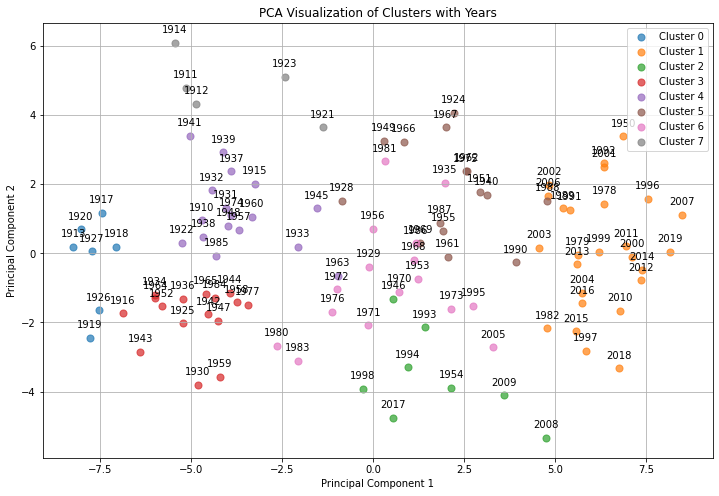

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have 'scaled_sst_data', 'cluster_labels', and 'years' as defined previously

# Reduce the dimensionality of your data to 2D using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)

# Create a scatter plot for visualizing clusters with years as labels
plt.figure(figsize=(12, 8))

# Assign a unique color to each cluster for plotting
unique_clusters = np.unique(cluster_labels)
colors = plt.cm.tab10(unique_clusters)

for cluster in unique_clusters:
    cluster_indices = np.where(cluster_labels == cluster)
    plt.scatter(
        pca_result[cluster_indices, 0], 
        pca_result[cluster_indices, 1],
        label=f'Cluster {cluster}',
        color=colors[cluster],
        alpha=0.7,
        s=50
    )

years = list(range(1910, 2020))

# Annotate points with years
for i, year in enumerate(years):
    plt.annotate(
        str(year),
        (pca_result[i, 0], pca_result[i, 1]),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center'
    )

plt.title('PCA Visualization of Clusters with Years')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [35]:
df = pd.DataFrame(values, columns=(['Cluster Number']))
df.to_csv('SSTA Cluster Number 1901-2010 with 8 clusters.csv')

In [36]:
predict_category=pd.read_csv(r"SSTA Category 2011-2022.csv",index_col=0)
predict_category

,region1,region2,region3,region4,region5,region6,region7,region8,region9,region10,region11,region12
0,7,6,6,4,3,3,5,6,4,3,6,6
1,4,7,6,5,4,4,7,5,4,7,6,5
2,6,7,7,4,4,4,6,4,5,7,7,7
3,6,7,7,5,5,6,6,5,6,7,7,7
4,7,7,7,6,6,7,7,6,7,6,7,7
5,6,7,7,6,7,7,7,5,6,7,7,7
6,7,7,7,6,6,6,7,6,5,4,7,7
7,6,7,7,4,4,6,7,7,6,7,7,7
8,7,7,7,6,6,6,7,6,6,6,7,7
9,7,7,7,6,6,6,7,6,6,7,7,7


In [37]:
predicted=km.predict(predict_category)

In [38]:
predicted

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2])

In [39]:
df = pd.DataFrame(predicted, columns=(['Cluster Number']))
df.to_csv('SSTA Cluster Number 2011-2022 with 8 clusters.csv')
df

,Cluster Number
0,2
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1
